# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Startups Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Lets Understand some of the most Interesting Patterns of Funding and Startups.

**How Does the Funding Ecosystem changes with respect to Time?**

**What is the General Amount that Startups get in India?**

**Which Kind of Industries are more preferred for Startups?**

**Does Location also play a role, In determining the Growth of a Startup?**

**Who plays the main role in Indian Startups Ecosystem?**

**What are the different Types of Funding for Startups?**

# Data Reading & Cleaning

Açıklama:

Hindistan dünyanın en hızlı büyüyen ekonomilerinden biridir. Son yıllarda Hint girişim ekosisteminde küresel çapta etki yaratan çok sayıda "unicorn" girişimin yükselişine tanık olduk.

Bu not defterinde, Hint girişim fonlama veri seti üzerinde keşifsel veri analizi (EDA) gerçekleştireceğiz, bazı çıkarımlar yapacağız ve Hint girişim ekosistemi hakkında belirli soruları yanıtlamaya çalışacağız.

In [153]:
# Import Libraries
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [154]:
# Importing dataset
dataset = pd.read_csv('startup_funding.csv')

## Adım 1: Veri Setini Anlamak

In [155]:
# Veri Setinin Ön İzlemesi
dataset.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [156]:
# Veri Setinin Boyutları - (rows, columns)
dataset.shape

(3044, 10)

In [157]:
# Veri Tipi Özellikleri
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [158]:
# Null Değerlerin kontrol edilmesi
(dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

Remarks              86.24 %
Amount in USD        31.54 %
SubVertical          30.75 %
City  Location        5.91 %
Industry Vertical     5.62 %
Investors Name        0.79 %
InvestmentnType       0.13 %
Sr No                  0.0 %
Date dd/mm/yyyy        0.0 %
Startup Name           0.0 %
dtype: object

### Gözlemler:

Bağımlı değişken olan 'Amount in USD' (ABD Doları cinsinden miktar) üzerinde bazı ön işlemler yapılması gerekiyor; virgüllerin kaldırılması ve boş değerlerle ilgilenilmesi gibi.

'Date' (Tarih) özelliğinin ön işleme tabi tutulması ve grafikler oluşturmak için kullanışlı olması adına sayısal formata dönüştürülmesi gerekiyor.

'Remarks' (Açıklamalar) özelliği yaklaşık %86,23 oranında boş değer içeriyor, dolayısıyla bunu kaldırabiliriz.

## Adım 2 Veri Ön İşleme

In [159]:
#'Amount in USD' kolonundan virgüllerin değştirilmesi
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x: str(x).replace(',', ''))

In [160]:
# 'Amount in USD' kolonundan hatalı değerlerin düzeltilmesi
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("undisclosed", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("unknown", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("14342000+", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("nan", "0"))


In [161]:
# Sayısal veriye dönüştürülmesi
dataset['Amount in USD'] = pd.to_numeric(dataset['Amount in USD'])

In [162]:
# 'Amount in USD' en çok görülen değerlerin tespit edilmesi
dataset['Amount in USD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

0.0           32.16 %
1000000.0      5.45 %
500000.0       3.55 %
2000000.0      2.27 %
3000000.0      2.17 %
5000000.0      2.17 %
10000000.0     1.97 %
100000.0       1.87 %
150000.0       1.48 %
200000.0       1.45 %
Name: Amount in USD, dtype: object

In [163]:
# 'Amount in USD' 0 değerlerinin boş değerlerle değiştirilmesi
dataset['Amount in USD'] = dataset['Amount in USD'].replace(0, np.nan)

In [164]:
# Boş değerleri ortalama ile değiştirme
dataset['Amount in USD'].fillna(dataset['Amount in USD'].mean(), inplace = True)

In [165]:
# Tarih sütunundaki hatalı değerlerin düzeltilmesi
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '12/05.2015'] = '12/05/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '13/04.2015'] = '13/04/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '15/01.2015'] = '15/01/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '22/01//2015'] = '22/01/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '01/07/015'] = '01/07/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '\\xc2\\xa010/7/2015'] = '10/07/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [166]:
# Tarih formatını belirterek datetime tipine dönüştürelim
dataset['Date dd/mm/yyyy'] = pd.to_datetime(dataset['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')

# 'Year Month' sütununu oluşturmak
dataset['Year Month'] = (dataset['Date dd/mm/yyyy'].dt.year * 100) + dataset['Date dd/mm/yyyy'].dt.month

# Dönüştürme işleminin başarılı olduğunu kontrol edelim
dataset[['Date dd/mm/yyyy', 'Year Month']].head()

,Date dd/mm/yyyy,Year Month
0,2020-01-09,202001
1,2020-01-13,202001
2,2020-01-09,202001
3,2020-01-02,202001
4,2020-01-02,202001


In [167]:
# 'Remarks' kolonunun % 86.24 ü boş değerlerden oluşuyor o yüzden bu satırı kaldıryoruz
dataset.drop('Remarks', axis = 1, inplace = True)

In [168]:
# Data sette kullanılan 'Bengaluru' yerine daha yaygın bir isim olan  'Bangalore' ile değiştirilmesi 
dataset['City  Location'][dataset['City  Location'] == 'Bengaluru'] = 'Bangalore'

In [169]:
# 'Undisclosed investors' kolonunda yer alan ismin'Undisclosed Investors' ile değiştirilmesi
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'

In [170]:
# 'Ola Cabs' daki boşluğun kaldırılması. 
dataset['Startup Name'][dataset['Startup Name'] == 'Ola Cabs'] = 'OlaCabs'

In [171]:
# Daha yaygın kullanılan bir kelimeyle değiştirme
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed\\\\nFunding'] = 'Seed Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Angel / Seed Funding'] = 'Seed / Angel Funding'

## 3. Keşif Amaçlı Veri Analizi

# How Does the Funding Ecosystem changes with respect to Time?


In [172]:

months = dataset['Year Month'].value_counts()

In [173]:
print('Aylara Göre Ortalama Finansman Sayısı',months.values.mean())

Aylara Göre Ortalama Finansman Sayısı 50.733333333333334


In [174]:
print('Bir Ayda En Düşük Finansman Sayısı',months.values.min())

Bir Ayda En Düşük Finansman Sayısı 3


In [175]:
print('Bir Ayda Maksimum Finansman Sayısı',months.values.max())

Bir Ayda Maksimum Finansman Sayısı 104


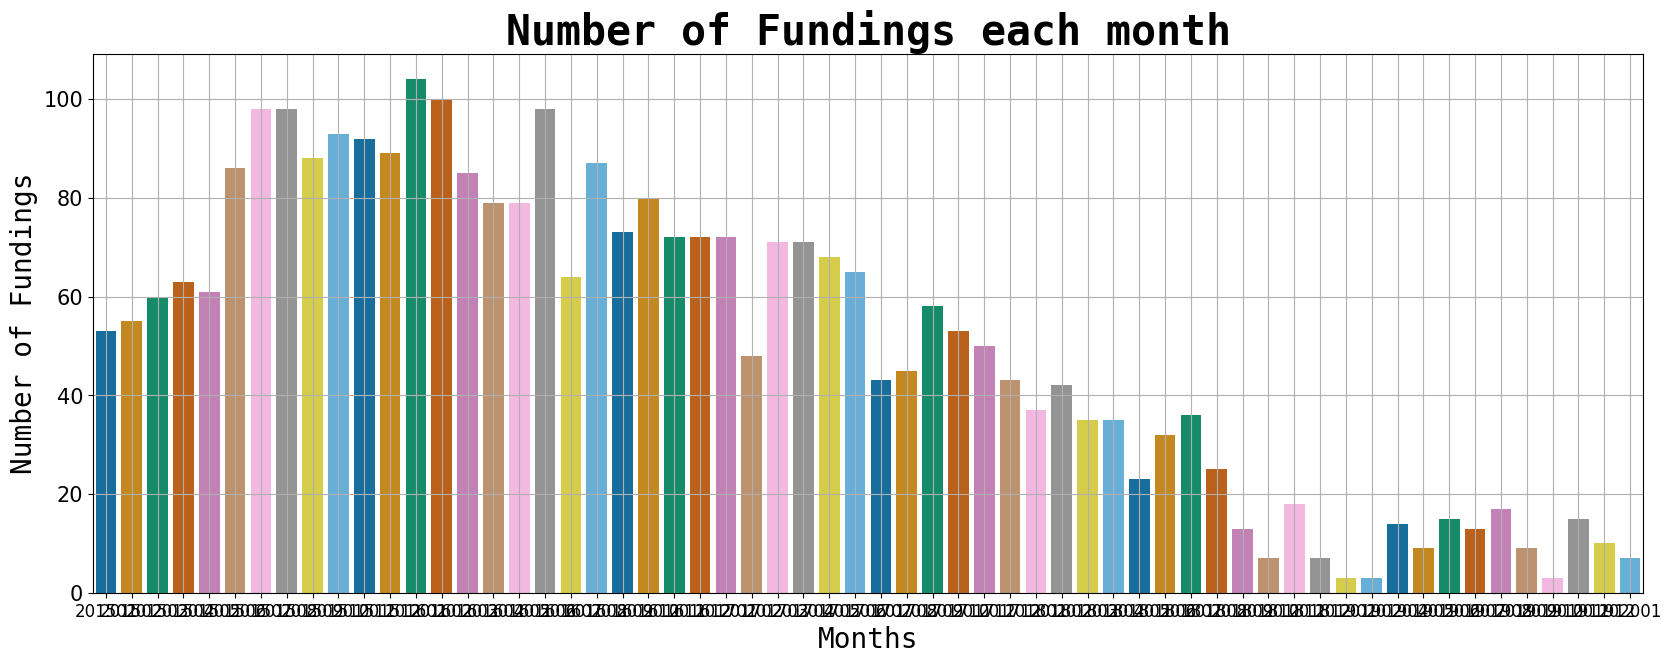

In [176]:
# Aylara göre barplot çizilmesi
plt.figure(figsize=(20, 7))

sns.barplot(x=months.index, y=months.values, palette='colorblind')

plt.title('Number of Fundings each month', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})

plt.xlabel('Months', fontdict={'fontname': 'Monospace', 'fontsize': 20})

plt.ylabel('Number of Fundings', fontdict={'fontname': 'Monospace', 'fontsize': 20})

plt.tick_params(axis='x', labelsize=12)

plt.tick_params(axis='y', labelsize=15)

plt.grid()

plt.show()

# What is the General Amount that Startups get in India?


In [177]:
# En çok Finanse edilen ilk 10 Girşimin Ön İzlemesi
dataset['Amount in USD'].sort_values(ascending = False).head(10)

60      3.900000e+09
651     2.500000e+09
966     1.400000e+09
830     1.400000e+09
31      1.000000e+09
2648    7.000000e+08
2459    6.800000e+08
188     6.000000e+08
33      5.850000e+08
2244    5.000000e+08
Name: Amount in USD, dtype: float64

In [178]:
# En çok finanse edilen 10 Girşiminin ayrıntılarının ön izlemesi
dataset.sort_values(by = 'Amount in USD', ascending = False).head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,3.900000e+09,201908
651,652,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
966,967,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
830,831,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911


In [179]:
# Bir Startup trafaından alınan ortalama fonun hesaplanması
dataset['Amount in USD'].mean() 

18429897.27080872

In [180]:
# En az finanse edilen girişimlerin önizlemesi
dataset['Amount in USD'].sort_values().head(10)

3020    16000.0
3021    16000.0
3019    16000.0
3018    16000.0
3017    16000.0
2933    16600.0
2934    16600.0
2935    16600.0
2936    16600.0
2937    16600.0
Name: Amount in USD, dtype: float64

In [181]:
# En az finanse edilen girişimlerin ayrıntılarının önizlemesi
dataset.sort_values(by = 'Amount in USD').head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month
3020,3021,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3021,3022,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3019,3020,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3018,3019,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3017,3018,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


# Which Kind of Industries are more preferred for Startups?

# Does Location also play a role, In determining the Growth of a Startup?

# Who plays the main role in Indian Startups Ecosystem?

In [189]:
dataset

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,2.000000e+08,202001
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8.048394e+06,202001
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,1.835886e+07,202001
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3.000000e+06,202001
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.800000e+06,202001
...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4.500000e+06,201501
3040,3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,8.250000e+05,201501
3041,3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1.500000e+06,201501
3042,3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,1.842990e+07,201501


In [182]:
# 'AmountInUSD' sütununun sayısal değere dönüştürülmesi
dataset['Amount in USD'] = dataset['Amount in USD'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [184]:
# En çok yatırım alan startup'ları gruplandırma ve sıralama
top_startups = dataset.groupby('Startup Name')['Amount in USD'].sum().sort_values(ascending=False)

# En çok yatırım alan ilk 10 startup
top_10_startups = top_startups.head(10)
top_10_startups


Startup Name
Flipkart            4.059700e+09
Rapido Bike Taxi    3.900000e+09
Paytm               3.185810e+09
Ola                 9.845000e+08
Udaan               8.700000e+08
Snapdeal            7.000000e+08
Flipkart.com        7.000000e+08
OlaCabs             6.881299e+08
True North          6.000000e+08
BigBasket           5.070000e+08
Name: Amount in USD, dtype: float64

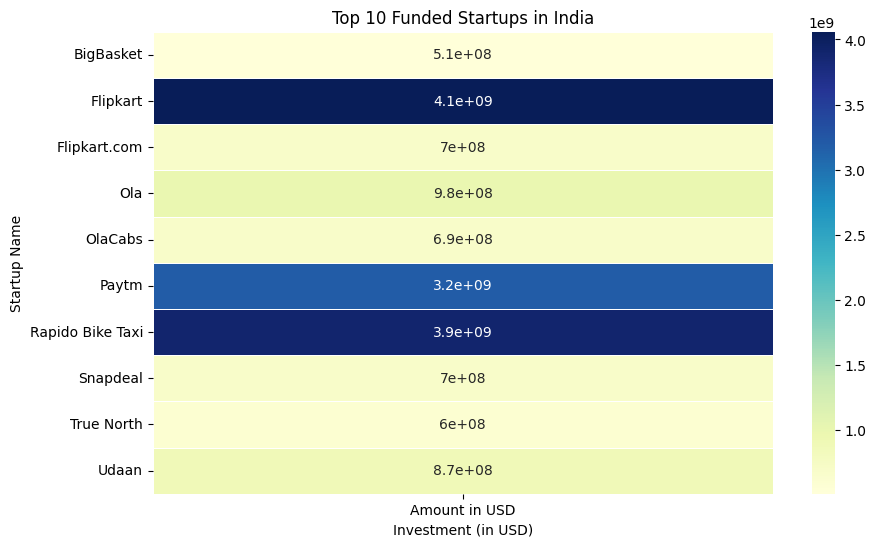

In [186]:
# İlk 10 startup'ın toplam yatırım miktarlarını DataFrame'e dönüştürme
top_10_dataset = top_10_startups.reset_index()

# Heatmap oluşturma
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_dataset.pivot_table(values='Amount in USD', index='Startup Name'), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Top 10 Funded Startups in India')
plt.xlabel('Investment (in USD)')
plt.show()


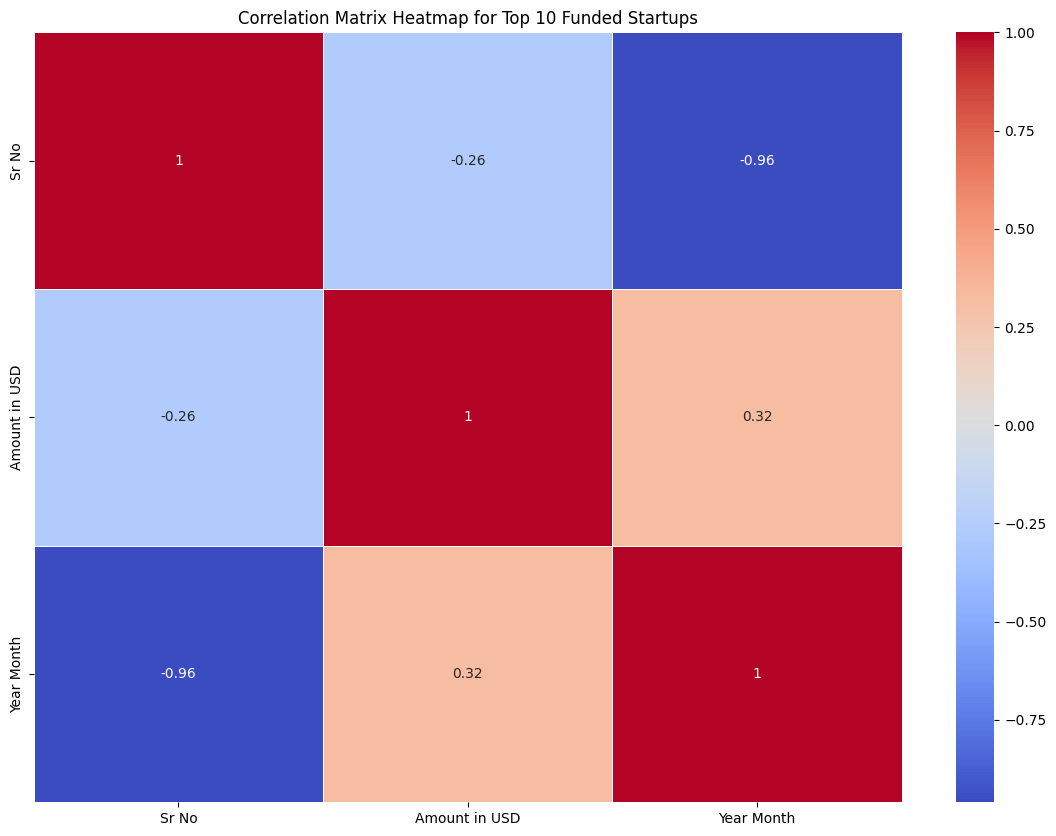

In [187]:
# İlk 10 startup'ı filtreleme
top_10_names = top_10_startups.index.tolist()
dataset_top_10 = dataset[dataset['Startup Name'].isin(top_10_names)]

# Korelasyon matrisi oluşturma
correlation_matrix = dataset_top_10.corr()

# Heatmap oluşturma
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Top 10 Funded Startups')
plt.show()


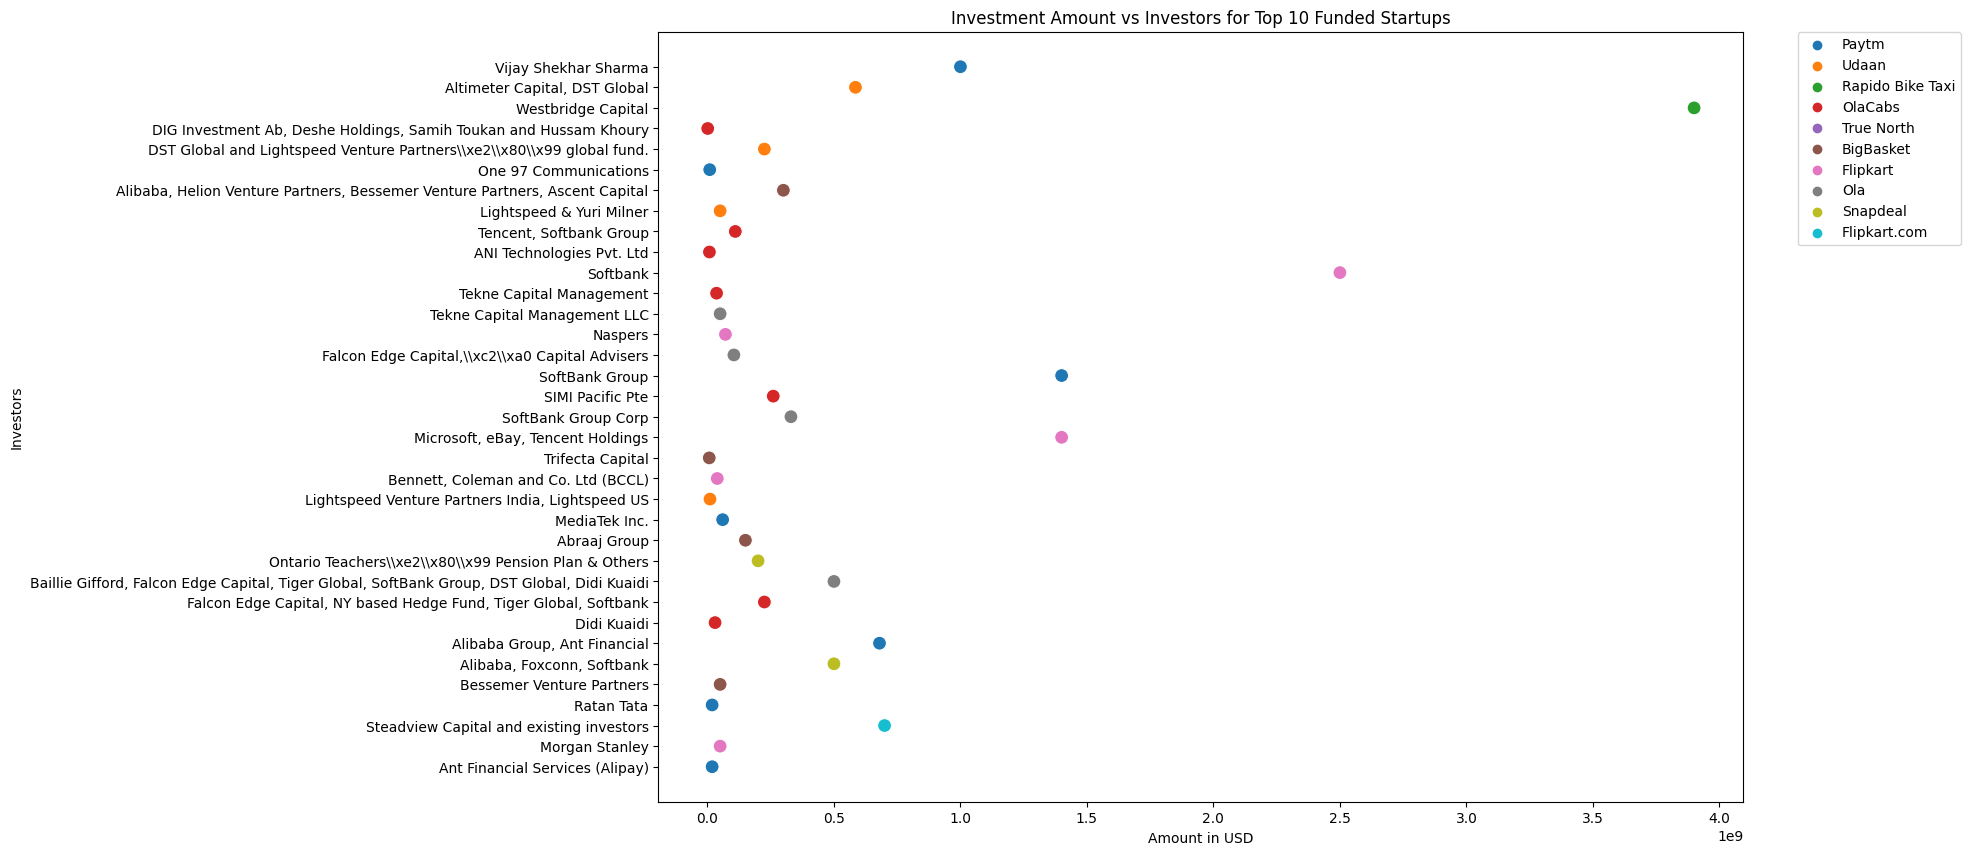

In [188]:
# Scatter plot için seaborn paketini kullanarak veri görselleştirme

plt.figure(figsize=(14, 10))
sns.scatterplot(x='Amount in USD', y='Investors Name', hue='Startup Name', data=dataset_top_10, palette='tab10', s=100)
plt.title('Investment Amount vs Investors for Top 10 Funded Startups')
plt.xlabel('Amount in USD')
plt.ylabel('Investors')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [190]:
# 'Startup Name' sütununu dummy değişkenlere dönüştürme
df_dummies = pd.get_dummies(df, columns=['Startup Name'])

# Dönüştürülmüş veri setinin ilk birkaç satırını görüntüle
df_dummies.head()


,Sr No,Date dd/mm/yyyy,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month,"Startup Name_""BYJU\\'S""",...,Startup Name_practo,Startup Name_quizizz,Startup Name_rBus,Startup Name_trueHb,Startup Name_underDOGS,Startup Name_vImmune,Startup Name_vPhrase Analytics,Startup Name_wWhere,Startup Name_wayForward,Startup Name_zippserv
0,1,2020-01-09,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.0,202001,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2020-01-13,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2020-01-09,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,202001,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2020-01-02,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202001,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2020-01-02,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202001,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
# Korelasyon matrisi oluşturma
correlation_matrix = df_dummies.corr()

# Korelasyon matrisini görüntüle
correlation_matrix.head()


,Sr No,Amount in USD,Year Month,"Startup Name_""BYJU\\'S""",Startup Name_#Fame,Startup Name_121Policy,Startup Name_19th mile,Startup Name_1Crowd,Startup Name_1mg,Startup Name_1mg (Healthkartplus),...,Startup Name_practo,Startup Name_quizizz,Startup Name_rBus,Startup Name_trueHb,Startup Name_underDOGS,Startup Name_vImmune,Startup Name_vPhrase Analytics,Startup Name_wWhere,Startup Name_wayForward,Startup Name_zippserv
Sr No,1.000000,-0.066031,-0.945808,-0.030006,0.030336,-5.766029e-03,-0.027242,-1.061403e-02,-0.015779,0.027283,...,0.019959,-0.027799,2.119712e-02,0.023322,5.879493e-04,-6.673740e-03,6.673740e-03,0.028479,-0.016370,-0.027386
Amount in USD,-0.066031,1.000000,0.089571,0.023864,-0.001529,5.076317e-18,-0.003310,1.975791e-18,-0.001387,-0.002255,...,0.012981,-0.002799,5.181565e-19,-0.002908,6.086895e-18,5.414166e-18,4.728735e-18,-0.003307,-0.003161,-0.003263
Year Month,-0.945808,0.089571,1.000000,0.045043,-0.021077,-3.162822e-03,0.028757,1.165719e-02,0.016157,-0.020589,...,-0.019937,0.028920,-1.993712e-02,-0.020100,-3.814251e-03,-3.162822e-03,-4.465680e-03,-0.020751,0.012309,0.028757
"Startup Name_""BYJU\\'S""",-0.030006,0.023864,0.045043,1.000000,-0.000329,-3.286231e-04,-0.000329,-3.286231e-04,-0.000658,-0.000329,...,-0.000329,-0.000329,-3.286231e-04,-0.000329,-3.286231e-04,-3.286231e-04,-3.286231e-04,-0.000329,-0.000329,-0.000329
Startup Name_#Fame,0.030336,-0.001529,-0.021077,-0.000329,1.000000,-3.286231e-04,-0.000329,-3.286231e-04,-0.000658,-0.000329,...,-0.000329,-0.000329,-3.286231e-04,-0.000329,-3.286231e-04,-3.286231e-04,-3.286231e-04,-0.000329,-0.000329,-0.000329


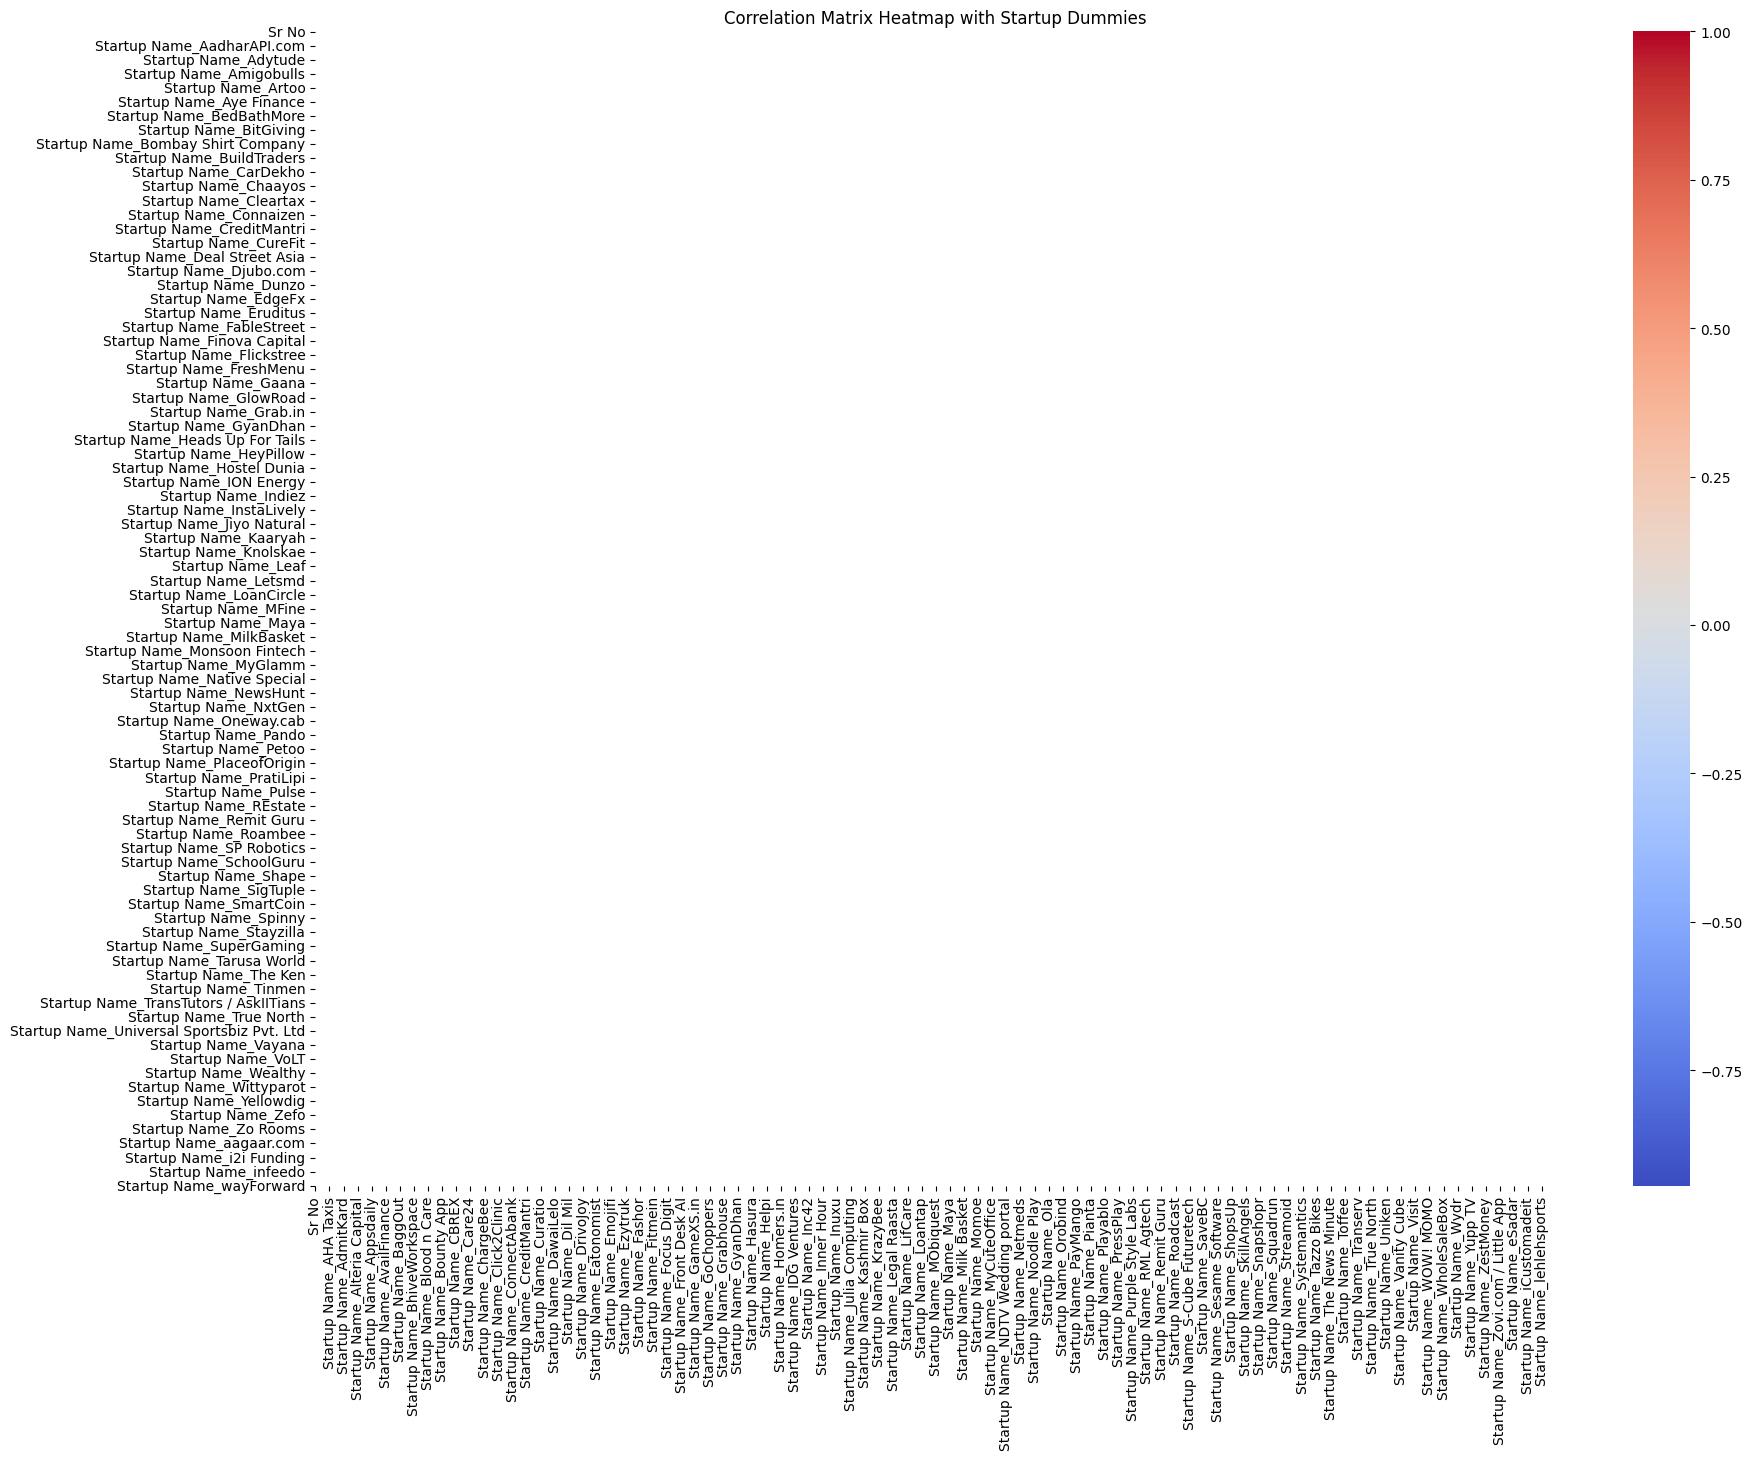

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap oluşturma
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap with Startup Dummies')
plt.show()


# What are the different Types of Funding for Startups?

# Conclusions

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Startups Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |